In [1]:
from google.colab import files
files.upload()  # Upload kaggle.json

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"arnavgoel26","key":"3ef3ea797bd04e15077e5c8ee174f4a3"}'}

In [2]:
import json
import os

# Save the uploaded file
with open('kaggle (1).json', 'r') as f:
    kaggle_data = json.load(f)

# Set permissions
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
with open(os.path.expanduser("~/.kaggle/kaggle.json"), "w") as f:
    json.dump(kaggle_data, f)

os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)


In [3]:
import os
import shutil
!kaggle datasets download -d shubham2703/five-crop-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/shubham2703/five-crop-diseases-dataset
License(s): CC-BY-NC-SA-4.0


In [4]:
!unzip five-crop-diseases-dataset.zip -d five_crop_diseases

Streaming output truncated to the last 5000 lines.
  inflating: five_crop_diseases/Crop Diseases Dataset/Crop Diseases/Crop___Disease/Rice/Rice___Leaf_Blast/IMG_20190419_125251.jpg  
  inflating: five_crop_diseases/Crop Diseases Dataset/Crop Diseases/Crop___Disease/Rice/Rice___Leaf_Blast/IMG_20190419_125403.jpg  
  inflating: five_crop_diseases/Crop Diseases Dataset/Crop Diseases/Crop___Disease/Rice/Rice___Leaf_Blast/IMG_20190419_125426.jpg  
  inflating: five_crop_diseases/Crop Diseases Dataset/Crop Diseases/Crop___Disease/Rice/Rice___Leaf_Blast/IMG_20190419_125429.jpg  
  inflating: five_crop_diseases/Crop Diseases Dataset/Crop Diseases/Crop___Disease/Rice/Rice___Leaf_Blast/IMG_20190419_125436.jpg  
  inflating: five_crop_diseases/Crop Diseases Dataset/Crop Diseases/Crop___Disease/Rice/Rice___Leaf_Blast/IMG_20190419_125441.jpg  
  inflating: five_crop_diseases/Crop Diseases Dataset/Crop Diseases/Crop___Disease/Rice/Rice___Leaf_Blast/IMG_20190419_125504.jpg  
  inflating: five_crop_di

In [5]:
directory_path = r'five_crop_diseases/Crop Diseases Dataset/Crop Diseases/Crop___Disease/Potato'

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, Model
import os

In [7]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 30

In [8]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory_path,
    shuffle="True",
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE)

Found 2152 files belonging to 3 classes.


In [9]:
class_names=dataset.class_names
class_names

['Potato___Early_Blight', 'Potato___Healthy', 'Potato___Late_Blight']

Potato___Early_Blight: 1000
Potato___Late_Blight: 1000
Potato___Healthy: 152


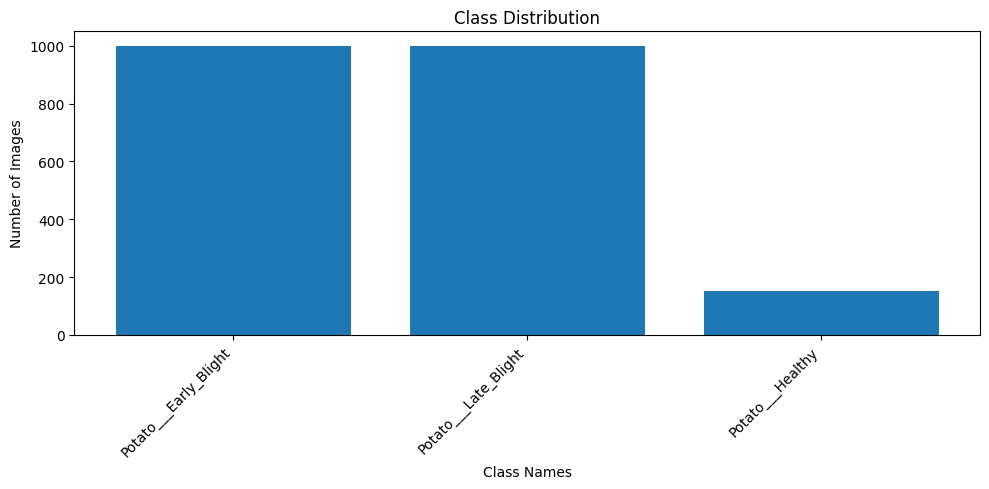

In [10]:
import matplotlib.pyplot as plt

# Assuming 'dataset' is already defined from the previous code
class_counts = {}
for images, labels in dataset:
    for label in labels.numpy():
        class_name = class_names[label]
        class_counts[class_name] = class_counts.get(class_name, 0) + 1

# Print the class counts
for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")

# Optional: Visualize the class distribution using a bar chart
plt.figure(figsize=(10, 5))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel("Class Names")
plt.ylabel("Number of Images")
plt.title("Class Distribution")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array # Import load_img and img_to_array
import os
import numpy as np

# Paths
healthy_dir = 'five_crop_diseases/Crop Diseases Dataset/Crop Diseases/Crop___Disease/Potato/Potato___Healthy'
augmented_dir = 'five_crop_diseases/Crop Diseases Dataset/Crop Diseases/Crop___Disease/Potato/Potato___Healthy_Augmented'
os.makedirs(augmented_dir, exist_ok=True)

# ImageDataGenerator with transformations
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

images = os.listdir(healthy_dir)
target_count = 1000  # match the other classes
generated = 0

for img_name in images:
    if generated >= target_count - len(images):
        break

    img_path = os.path.join(healthy_dir, img_name)
    img = load_img(img_path) # Now load_img is defined and can be called
    x = img_to_array(img) # Now img_to_array is defined and can be called
    x = np.expand_dims(x, axis=0)

    i = 0
    for batch in datagen.flow(x, batch_size=1, save_to_dir=augmented_dir, save_prefix='aug', save_format='jpg'):
        i += 1
        generated += 1
        if i >= 5 or generated >= target_count - len(images):
            break

In [21]:
import os
import shutil

original_root = 'five_crop_diseases/Crop Diseases Dataset/Crop Diseases/Crop___Disease/Potato'
new_root = 'five_crop_diseases/Potato_balanced'

os.makedirs(new_root, exist_ok=True)

# Copy Early and Late Blight
for cls in ['Potato___Early_Blight', 'Potato___Late_Blight']:
    shutil.copytree(os.path.join(original_root, cls),
                    os.path.join(new_root, cls),
                    dirs_exist_ok=True)

# Rename Healthy_Augmented to Healthy
shutil.copytree(os.path.join(original_root, 'Potato___Healthy_Augmented'),
                os.path.join(new_root, 'Potato___Healthy'),
                dirs_exist_ok=True)


'five_crop_diseases/Potato_balanced/Potato___Healthy'

In [22]:
import tensorflow as tf

IMAGE_SIZE = 224
BATCH_SIZE = 32

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'five_crop_diseases/Potato_balanced',
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE)


Found 2730 files belonging to 3 classes.


In [23]:
dataset_size = tf.data.experimental.cardinality(dataset).numpy()
train_size = int(0.8 * dataset_size)

train_dataset = dataset.take(train_size).cache().shuffle(buffer_size=1000)
val_dataset = dataset.skip(train_size).cache()

AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)

# Efficient Net

In [55]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, Model

input_layer = layers.Input(shape=(224, 224, 3), name="input")

base_model = EfficientNetB0(weights='imagenet', include_top=False, input_tensor=input_layer)

base_model.trainable = False

x = base_model.output
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Conv2D(256, (3, 3), padding='same')(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.GlobalAveragePooling2D()(x)
output_layer = layers.Dense(3, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output_layer)

model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)        │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_6 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ input[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_3           │ (None, 224, 224, 3)    │              7 │ rescaling_6[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_7 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ normalization_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 225, 225, 3)    │              0 │ rescaling_7[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 112, 112, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 112, 112, 32)   │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 112, 112, 32)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_expand    

 Total params: 7,004,838 (26.72 MB)

 Trainable params: 2,952,707 (11.26 MB)

 Non-trainable params: 4,052,131 (15.46 MB)

In [56]:
model.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate = 0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [57]:
history = model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=4,
        verbose=1
    )

Epoch 1/4
68/68 ━━━━━━━━━━━━━━━━━━━━ 39s 203ms/step - accuracy: 0.7626 - loss: 3.6371 - val_accuracy: 0.9910 - val_loss: 0.0596
Epoch 2/4
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.9868 - loss: 0.0653 - val_accuracy: 0.9838 - val_loss: 0.0585
Epoch 3/4
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.9942 - loss: 0.0679 - val_accuracy: 0.9856 - val_loss: 0.0836
Epoch 4/4
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.9919 - loss: 0.0303 - val_accuracy: 0.9964 - val_loss: 0.0081


In [58]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

test_loss, test_accuracy = model.evaluate(val_dataset)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

y_true = []
y_pred = []

for images, labels in val_dataset:
    predictions = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(predictions, axis=1))

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9961 - loss: 0.0062
Test Loss: 0.00808925274759531
Test Accuracy: 0.9963898658752441
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


In [59]:
class_names=["Early Blight","Healthy","Late Blight"]

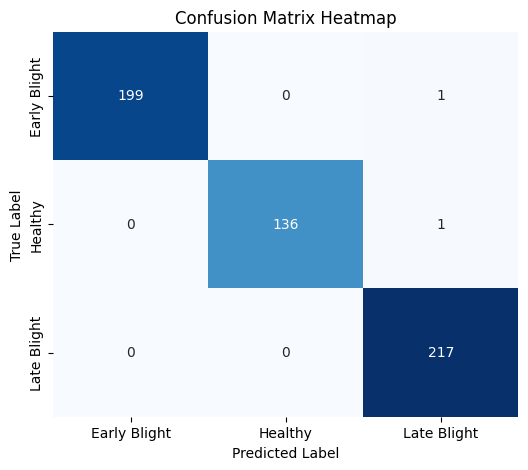

In [60]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names,cbar=False)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [61]:
class_report = classification_report(y_true, y_pred)
print("Classification Report:")
print(class_report)

accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       200
           1       1.00      0.99      1.00       137
           2       0.99      1.00      1.00       217

    accuracy                           1.00       554
   macro avg       1.00      1.00      1.00       554
weighted avg       1.00      1.00      1.00       554

Accuracy: 0.9963898916967509


# VGG 16

In [62]:
from tensorflow.keras.applications import VGG16

input_layer = layers.Input(shape=(224, 224, 3), name="input")
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=input_layer)
base_model.trainable = False  # Freeze layers

x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
output_layer = layers.Dense(3, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output_layer)

In [63]:
model.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate = 0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [64]:
history = model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=5,
        verbose=1
    )

Epoch 1/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 17s 230ms/step - accuracy: 0.4439 - loss: 3.2835 - val_accuracy: 0.8736 - val_loss: 0.3082
Epoch 2/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 15s 228ms/step - accuracy: 0.8927 - loss: 0.2730 - val_accuracy: 0.9296 - val_loss: 0.1726
Epoch 3/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 15s 225ms/step - accuracy: 0.9270 - loss: 0.1714 - val_accuracy: 0.9495 - val_loss: 0.1389
Epoch 4/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 15s 216ms/step - accuracy: 0.9544 - loss: 0.1239 - val_accuracy: 0.9585 - val_loss: 0.1049
Epoch 5/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 15s 214ms/step - accuracy: 0.9665 - loss: 0.0805 - val_accuracy: 0.9621 - val_loss: 0.0907


In [65]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

test_loss, test_accuracy = model.evaluate(val_dataset)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

y_true = []
y_pred = []

for images, labels in val_dataset:
    predictions = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(predictions, axis=1))

18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step - accuracy: 0.9582 - loss: 0.0965
Test Loss: 0.09068070352077484
Test Accuracy: 0.9620938897132874
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


In [66]:
class_names=["Early Blight","Healthy","Late Blight"]

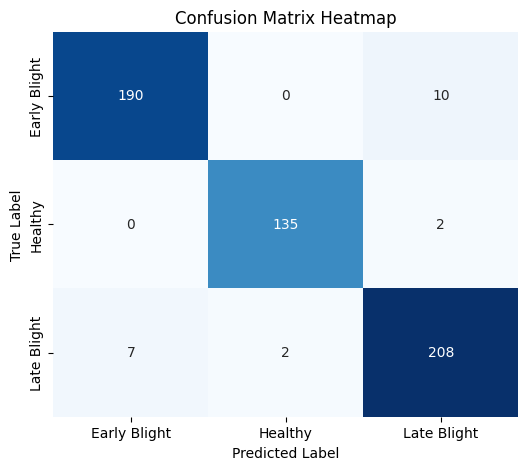

In [67]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names,cbar=False)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [68]:
class_report = classification_report(y_true, y_pred)
print("Classification Report:")
print(class_report)

accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       200
           1       0.99      0.99      0.99       137
           2       0.95      0.96      0.95       217

    accuracy                           0.96       554
   macro avg       0.97      0.96      0.96       554
weighted avg       0.96      0.96      0.96       554

Accuracy: 0.9620938628158845


# ResNet

In [69]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D

# Load Pretrained ResNet50 (Exclude top layers, use ImageNet weights)
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers (optional, for transfer learning)
base_model.trainable = False  # Set to True if you want to fine-tune

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
# x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
output_layer = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output_layer)

# Summary of the model
model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 24,768,899 (94.49 MB)

 Trainable params: 1,181,187 (4.51 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [70]:
model.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate = 0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [71]:
history = model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=5,
        verbose=1
    )

Epoch 1/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 22s 177ms/step - accuracy: 0.8306 - loss: 0.4314 - val_accuracy: 0.9982 - val_loss: 0.0153
Epoch 2/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - accuracy: 0.9893 - loss: 0.0245 - val_accuracy: 0.9928 - val_loss: 0.0160
Epoch 3/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - accuracy: 0.9952 - loss: 0.0119 - val_accuracy: 0.9928 - val_loss: 0.0123
Epoch 4/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - accuracy: 0.9972 - loss: 0.0148 - val_accuracy: 0.9964 - val_loss: 0.0117
Epoch 5/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.9887 - loss: 0.0285 - val_accuracy: 0.9874 - val_loss: 0.0342


In [72]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

test_loss, test_accuracy = model.evaluate(val_dataset)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

y_true = []
y_pred = []

for images, labels in val_dataset:
    predictions = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(predictions, axis=1))

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.9938 - loss: 0.0213
Test Loss: 0.03423652797937393
Test Accuracy: 0.987364649772644
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


In [73]:
class_names=["Early Blight","Healthy","Late Blight"]

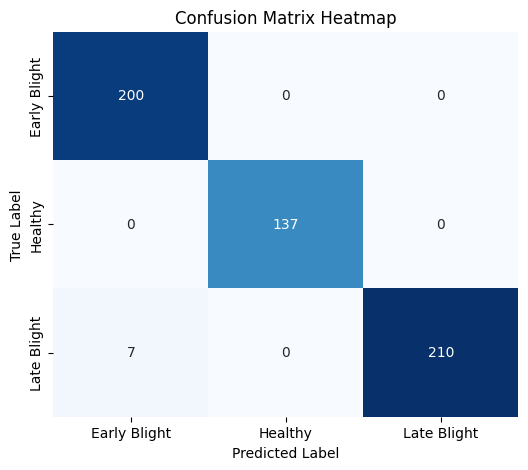

In [74]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names,cbar=False)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [75]:
class_report = classification_report(y_true, y_pred)
print("Classification Report:")
print(class_report)

accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       200
           1       1.00      1.00      1.00       137
           2       1.00      0.97      0.98       217

    accuracy                           0.99       554
   macro avg       0.99      0.99      0.99       554
weighted avg       0.99      0.99      0.99       554

Accuracy: 0.9873646209386282


# DenseNet

In [48]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import layers, Model
from tensorflow.keras.regularizers import l2

input_layer = layers.Input(shape=(224, 224, 3), name="input")

base_model = DenseNet121(weights='imagenet', include_top=False, input_tensor=input_layer)
base_model.trainable = False  # Unfreeze later for fine-tuning

# Custom Layers
x = layers.BatchNormalization()(base_model.output)
x = layers.ReLU()(x)
x = layers.Conv2D(256, (3, 3), padding='same', kernel_regularizer=l2(0.001))(x)  # L2 Regularization
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.4)(x)  # 40% Dropout for Regularization
output_layer = layers.Dense(3, activation='softmax')(x)  # 4 Classes

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

model.summary()

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)        │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, 230, 230, 3)    │              0 │ input[0][0]            │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,408 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_1          │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 56, 56, 64)     │              0 │ zero_padding2d_1[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 56, 56, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 56, 56, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block2_0_bn    

 Total params: 9,401,923 (35.87 MB)

 Trainable params: 2,362,371 (9.01 MB)

 Non-trainable params: 7,039,552 (26.85 MB)

In [49]:
model.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate = 0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [50]:
history = model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=5,
        verbose=1
    )

Epoch 1/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 68s 420ms/step - accuracy: 0.7176 - loss: 2.9163 - val_accuracy: 0.8484 - val_loss: 1.1205
Epoch 2/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - accuracy: 0.9733 - loss: 0.4214 - val_accuracy: 0.8592 - val_loss: 1.0133
Epoch 3/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.9869 - loss: 0.3477 - val_accuracy: 0.9224 - val_loss: 0.5594
Epoch 4/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.9942 - loss: 0.2822 - val_accuracy: 0.9477 - val_loss: 0.4571
Epoch 5/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.9784 - loss: 0.2918 - val_accuracy: 0.9747 - val_loss: 0.3225


In [51]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

test_loss, test_accuracy = model.evaluate(val_dataset)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

y_true = []
y_pred = []

for images, labels in val_dataset:
    predictions = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(predictions, axis=1))

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.9667 - loss: 0.3446
Test Loss: 0.3225306570529938
Test Accuracy: 0.9747292399406433
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step


In [52]:
class_names=["Early Blight","Healthy","Late Blight"]

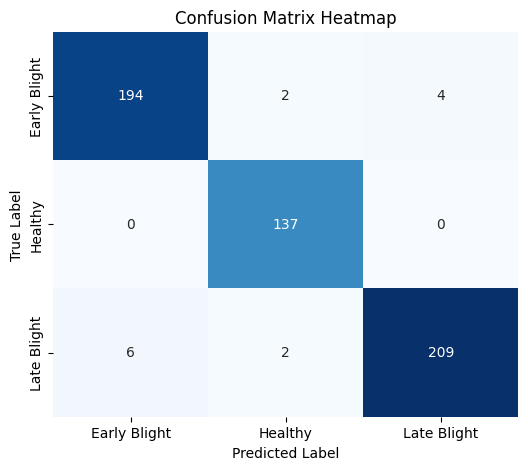

In [53]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names,cbar=False)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [54]:
class_report = classification_report(y_true, y_pred)
print("Classification Report:")
print(class_report)

accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       200
           1       0.97      1.00      0.99       137
           2       0.98      0.96      0.97       217

    accuracy                           0.97       554
   macro avg       0.97      0.98      0.98       554
weighted avg       0.97      0.97      0.97       554

Accuracy: 0.9747292418772563
